In [82]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.errors import ShapelyDeprecationWarning
import warnings
plt.rcParams['figure.figsize'] = [12, 12]  # add more space to figures

In [123]:
vtds = gpd.read_file('geo/MI_VTDs_2020/MI_VTDs_2020.shp')

<AxesSubplot:>

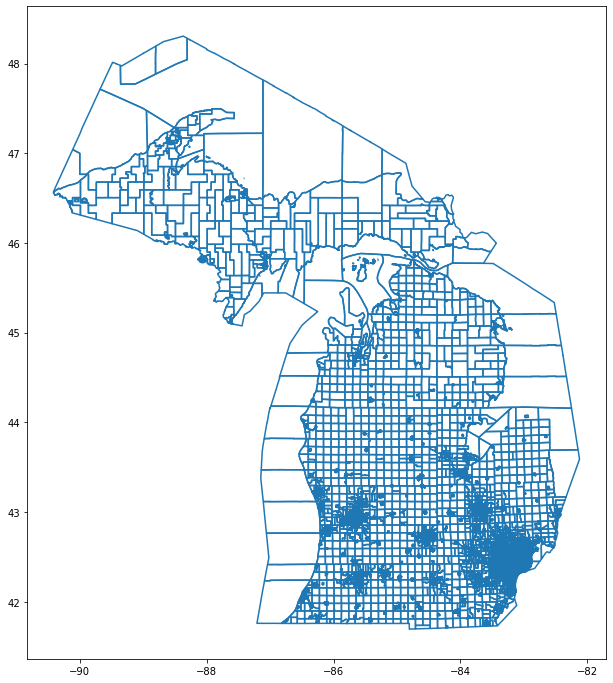

In [3]:
vtds.boundary.plot()

In [4]:
vtds

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,26,003,003001,26003003001,A,0030446000001,Voting District 0030446000001,V1,G5240,N,366843585,43425964,+46.3380932,-086.7739238,"MULTIPOLYGON (((-86.72267 46.48484, -86.72254 ..."
1,26,003,003007,26003003007,A,0035622000001,Voting District 0035622000001,V1,G5240,N,523821819,40068222,+46.4024760,-086.5105746,"POLYGON ((-86.67879 46.38334, -86.67877 46.383..."
2,26,003,003010,26003003010,A,0036916000001,Voting District 0036916000001,V1,G5240,N,208983301,652387,+46.3468839,-086.9948981,"POLYGON ((-87.11651 46.39118, -87.10728 46.391..."
3,26,003,003005,26003003005,A,0035236000001,Voting District 0035236000001,V1,G5240,N,183058104,3482479,+46.2149640,-086.8698593,"POLYGON ((-86.99081 46.23156, -86.99077 46.235..."
4,26,003,003009,26003003009,A,0036082000001,Voting District 0036082000001,V1,G5240,N,227225602,41073935,+46.4536416,-086.9688367,"POLYGON ((-87.11662 46.49507, -87.11651 46.499..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,26,159,159030,26159159030,A,1597498003001,Voting District 1597498003001,V1,G5240,N,2389384,239250,+42.4100351,-086.2719092,"POLYGON ((-86.28833 42.40196, -86.28440 42.402..."
4801,26,159,159032,26159159032,A,1597500000002,Voting District 1597500000002,V1,G5240,N,14825524,49380,+42.3503387,-086.2867211,"POLYGON ((-86.31115 42.33167, -86.31076 42.332..."
4802,26,159,159019,26159159019,A,1593696000001,Voting District 1593696000001,V1,G5240,N,3519795,12686,+42.2049586,-086.1661221,"POLYGON ((-86.17657 42.21501, -86.16929 42.215..."
4803,26,159,159002,26159159002,A,1590160000002,Voting District 1590160000002,V1,G5240,N,37663589,670801,+42.3010102,-085.8127518,"MULTIPOLYGON (((-85.82390 42.24556, -85.82384 ..."


In [8]:
vtds.GEOID20.nunique()

4805

In [7]:
vtds.GEOID20.nunique()

4805

In [124]:
vtds = vtds.dissolve(by="GEOID20").reset_index()  # combine VTD areas that have same name
vtds = vtds.rename(columns={"GEOID20":"VTD_ID"})  # rename identifying column for simplicity
vtds = vtds[["VTD_ID","geometry"]]

In [12]:
bgs = gpd.read_file('geo/MI_ACS5_2019_bg/MI_ACS5_2019_bg.shp')

<AxesSubplot:>

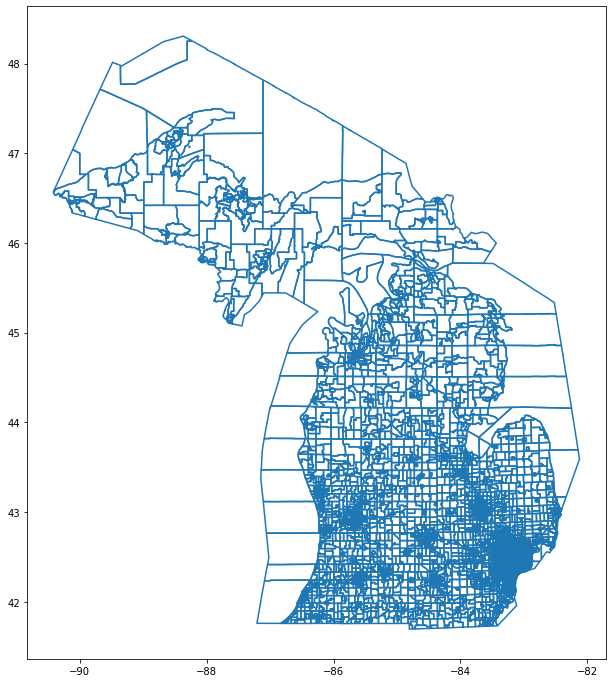

In [13]:
bgs.boundary.plot()

In [14]:
len(bgs)

8205

In [15]:
bgs.GEOID.nunique()

8205

In [16]:
bgs.columns

Index(['GEOID', 'NAME', 'STATE', 'COUNTY', 'TOTPOP19', 'TOTPOPMOE', 'N_HISP19',
       'N_HISPMOE', 'WHT_NH19', 'WHT_NHMOE', 'BLK_NH19', 'BLK_NHMOE', 'HISP19',
       'HISPMOE', 'WHT_H19', 'WHT_HMOE', 'BLK_H19', 'BLK_HMOE', 'BLK_ALL19',
       'BLK_ALLMOE', 'AIA_ALL19', 'AIA_ALLMOE', 'ASN_ALL19', 'ASN_ALLMOE',
       'NHP_ALL19', 'NHP_ALLMOE', 'OTH_ALL19', 'OTH_ALLMOE', 'STATEFP',
       'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'geometry'],
      dtype='object')

In [17]:
bgs = bgs.rename(columns={"GEOID":"BG_ID"})  # rename identifying column for simplicity
bgs = bgs[["BG_ID","TOTPOP19","WHT_NH19","BLK_NH19","HISP19","AIA_ALL19","ASN_ALL19","geometry"]]

In [18]:
def simple_map(data,boundary=True,variable=None,title=None):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
        # For some reason, below line prints deprecation warning for some but not all geometries
        # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
        if variable is not None:
            fig = data.plot(column=variable,legend=True)
            if title is None:
                title = variable
        elif boundary:
            fig = data.boundary.plot()
        else:
            fig = data.plot()
        if title is not None:
            plt.title(title)
        return fig

/var/folders/h2/1dptmntx7cqcbm48dz37csk00000gn/T/ipykernel_85501/3909874808.py:10: UserWarning: `keep_geom_type=True` in overlay resulted in 33121 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  overlap = gpd.overlay(vtds,bgs,how='union')


<AxesSubplot:title={'center':'Unique VTD-BG Combinations'}>

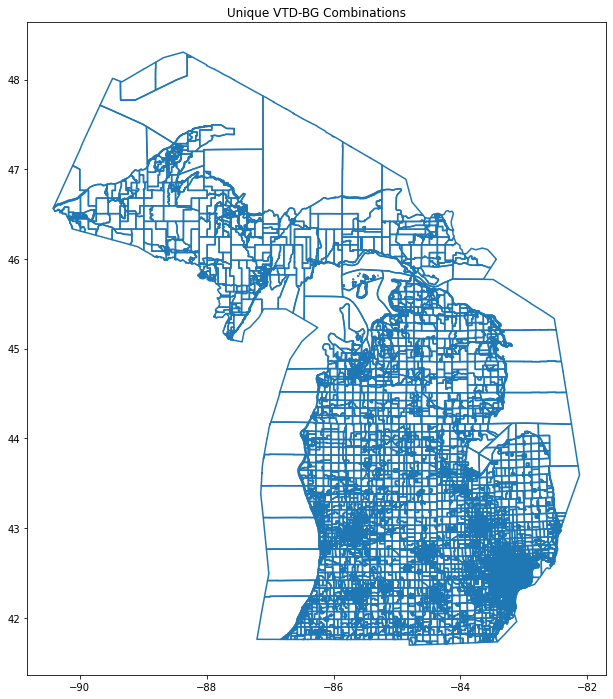

In [20]:
# We will use geopandas' spatial join function
# See https://geopandas.org/en/stable/docs/user_guide/set_operations.html
# We will first take the union of vtds and bgs. Every resulting geometry is a unique combination of vtds/bgs that overlap
# (or the area of each vtd/bg that doesn't overlap, if nonzero)

# warning: slow, like ~40 seconds

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    overlap = gpd.overlay(vtds,bgs,how='union')
overlap['area'] = overlap.apply(lambda row: row.geometry.area,axis=1)  # force-recalculate areas
simple_map(overlap,boundary=True,title="Unique VTD-BG Combinations")

Text(0.5, 1.0, 'BGs per VTD')

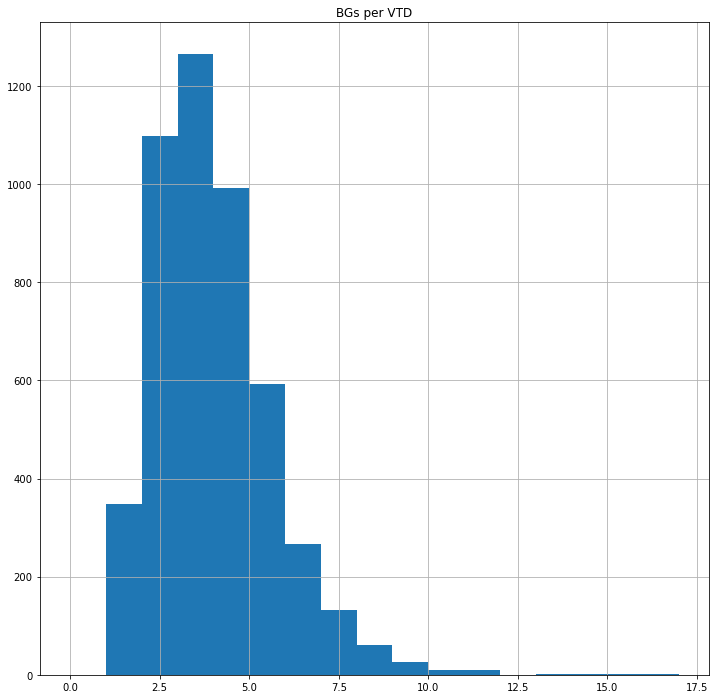

In [21]:
# calculate number of bgs overlapping with each VTD
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    bgs_per_vtd = overlap.groupby('VTD_ID').nunique()[["BG_ID"]]
bgs_per_vtd.hist(bins=range(0,18))
plt.title('BGs per VTD')

In [29]:
overlap = overlap.dropna(subset="VTD_ID")  # drop block fragments that don't overlap with precincts


<AxesSubplot:>

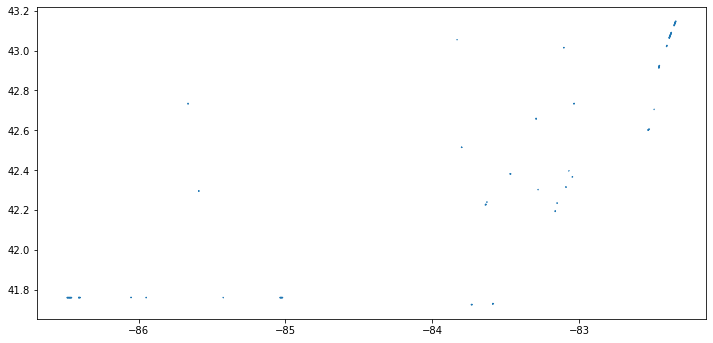

In [30]:
overlap[overlap["BG_ID"].isna()].boundary.plot()

In [31]:
overlap = overlap.dropna(subset="BG_ID")  # drop precinct fragments that don't overlap with blocks

,VTD_ID,BG_ID,TOTPOP19,WHT_NH19,BLK_NH19,HISP19,AIA_ALL19,ASN_ALL19,geometry,area
0,26001001001,260019701001,1181.0,1161.0,0.0,12.0,8.0,0.0,"POLYGON ((-83.40462 44.81776, -83.40461 44.818...",0.008781
1,26001001002,260019701001,1181.0,1161.0,0.0,12.0,8.0,0.0,"POLYGON ((-83.42016 44.85876, -83.41371 44.858...",0.000158
2,26001001009,260019701001,1181.0,1161.0,0.0,12.0,8.0,0.0,"POLYGON ((-83.40484 44.77149, -83.40183 44.771...",0.010319
3,26001ZZZZZZ,260019701001,1181.0,1161.0,0.0,12.0,8.0,0.0,"POLYGON ((-83.32146 44.85849, -83.31559 44.858...",0.002749
4,26007007015,260070009003,820.0,747.0,17.0,11.0,8.0,5.0,"POLYGON ((-83.41920 44.92539, -83.41908 44.925...",0.004938
...,...,...,...,...,...,...,...,...,...,...
16826,26165165004,261653806002,1275.0,1245.0,0.0,30.0,0.0,0.0,"POLYGON ((-85.39068 44.25148, -85.39080 44.251...",0.000051
16827,26165165004,261653806003,978.0,948.0,12.0,4.0,9.0,0.0,"MULTIPOLYGON (((-85.39118 44.25010, -85.39116 ...",0.000154
16828,26165165005,261653806003,978.0,948.0,12.0,4.0,9.0,0.0,"POLYGON ((-85.39116 44.25008, -85.39118 44.250...",0.000155
16829,26165165013,261653806003,978.0,948.0,12.0,4.0,9.0,0.0,"POLYGON ((-85.38135 44.25975, -85.38206 44.259...",0.000119


In [33]:
overlap.VTD_ID.nunique()

4805

In [50]:
# reproject geometries to equal-area projection to ensure we get accurate areas
vtds = vtds.to_crs("EPSG:3035")
bgs = bgs.to_crs("EPSG:3035")
overlap = overlap.to_crs("EPSG:3035")

In [46]:
bgs.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

In [51]:
# now we will add two columns to overlap:
# the fraction of relevant vtd in each intersected area
overlap["vtd_frac"] = 0
# the fraction of relevant bg in each intersected area
overlap["bg_frac"] = 0

# force recalculate areas
vtds['area'] = vtds.apply(lambda row: row.geometry.area,axis=1)
bgs['area'] = bgs.apply(lambda row: row.geometry.area,axis=1)
overlap['area'] = overlap.apply(lambda row: row.geometry.area,axis=1)

# fill in (may take ~30 seconds):
for row_index in range(len(overlap)):
    area = overlap.iloc[row_index]['area']  # fetches area
    vtd_num = overlap.iat[row_index,0]  # fetches vtd_num
    vtd_area = vtds[vtds.VTD_ID==vtd_num].area
    overlap.iat[row_index,10] = area/vtd_area  # sets beat_frac
    bg_num = overlap.iat[row_index,1]  # fetches bg
    bg_area = bgs[bgs.BG_ID==bg_num].area
    overlap.iat[row_index,11] = area/bg_area  # sets bg_frac

overlap.head()

,VTD_ID,BG_ID,TOTPOP19,WHT_NH19,BLK_NH19,HISP19,AIA_ALL19,ASN_ALL19,geometry,area,vtd_frac,bg_frac
0,26001001001,260019701001,1181.0,1161.0,0.0,12.0,8.0,0.0,"POLYGON ((-855339.111 6616223.724, -855276.152...",7.718788e+07,0.454786,0.398692
1,26001001002,260019701001,1181.0,1161.0,0.0,12.0,8.0,0.0,"POLYGON ((-851082.837 6619108.470, -851032.688...",1.389193e+06,0.007375,0.007175
2,26001001009,260019701001,1181.0,1161.0,0.0,12.0,8.0,0.0,"POLYGON ((-860276.573 6614377.601, -860232.556...",9.084084e+07,1.000000,0.469213
3,26001ZZZZZZ,260019701001,1181.0,1161.0,0.0,12.0,8.0,0.0,"POLYGON ((-850360.234 6611254.113, -850302.532...",2.418467e+07,0.008519,0.124919
4,26007007015,260070009003,820.0,747.0,17.0,11.0,8.0,5.0,"POLYGON ((-843964.703 6621707.914, -843975.558...",4.335648e+07,0.382160,0.777826


In [53]:
# assuming homogeneous block groups, calculate population stats per bg fragment
overlap["total_pop"] = overlap.TOTPOP19*overlap.bg_frac
overlap["abs_white"] = overlap.WHT_NH19*overlap.bg_frac
overlap["abs_Black"] = overlap.BLK_NH19*overlap.bg_frac
overlap["abs_Hispanic"] = overlap.HISP19*overlap.bg_frac
overlap["abs_AIA"] = overlap.AIA_ALL19*overlap.bg_frac
overlap["abs_Asian"] = overlap.ASN_ALL19*overlap.bg_frac

In [125]:
grouped_vtds = overlap.groupby("VTD_ID")
output_vtds = grouped_vtds.sum()
output_vtds = output_vtds.reset_index()

<AxesSubplot:>

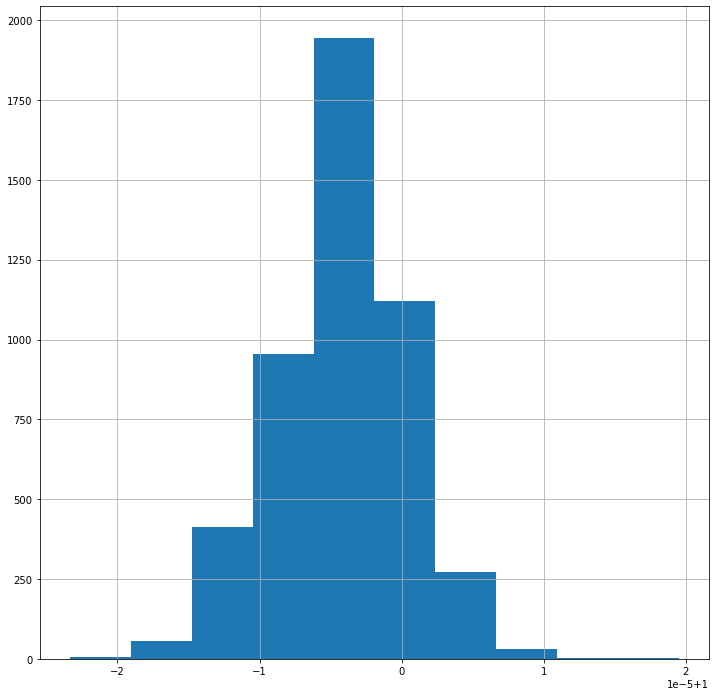

In [93]:
output_vtds.vtd_frac.hist()

In [126]:
output_vtds["pop_density"] = output_vtds["total_pop"]/output_vtds["area"]
output_vtds["prop_white"] = output_vtds["abs_white"]/output_vtds["total_pop"]
output_vtds["prop_Black"] = output_vtds["abs_Black"]/output_vtds["total_pop"]
output_vtds["prop_Hispanic"] = output_vtds["abs_Hispanic"]/output_vtds["total_pop"]
output_vtds["prop_AIA"] = output_vtds["abs_AIA"]/output_vtds["total_pop"]
output_vtds["prop_Asian"] = output_vtds["abs_Asian"]/output_vtds["total_pop"]

In [98]:
def simple_choropleth(data,variable,title=None):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
        # For some reason, below line prints deprecation warning for some but not all geometries
        # (for example, for community_areas but not for tracts)
        # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
        data.plot(column=variable,legend=True)
        if title is None:
            title = variable
        plt.title(title)
        plt.show()

In [127]:
# merge back to vtds
vtds = pd.merge(vtds,output_vtds,on="VTD_ID")

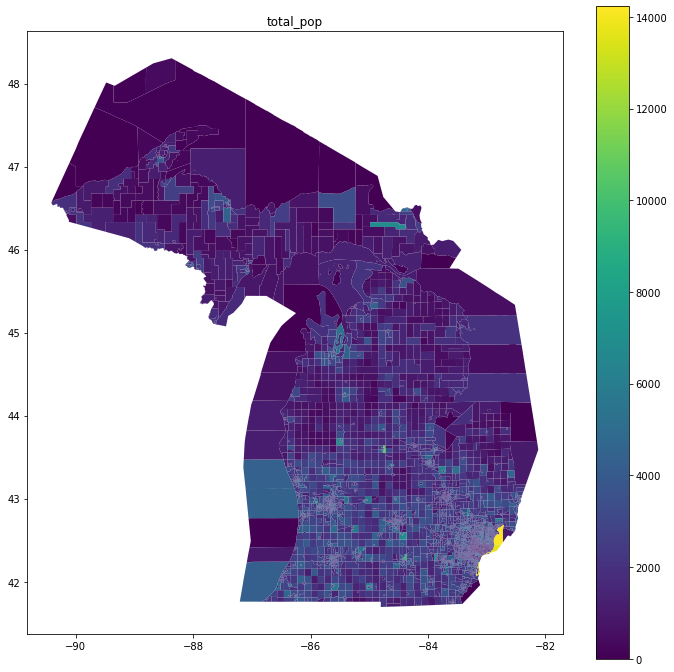

In [128]:
simple_choropleth(vtds,"total_pop")

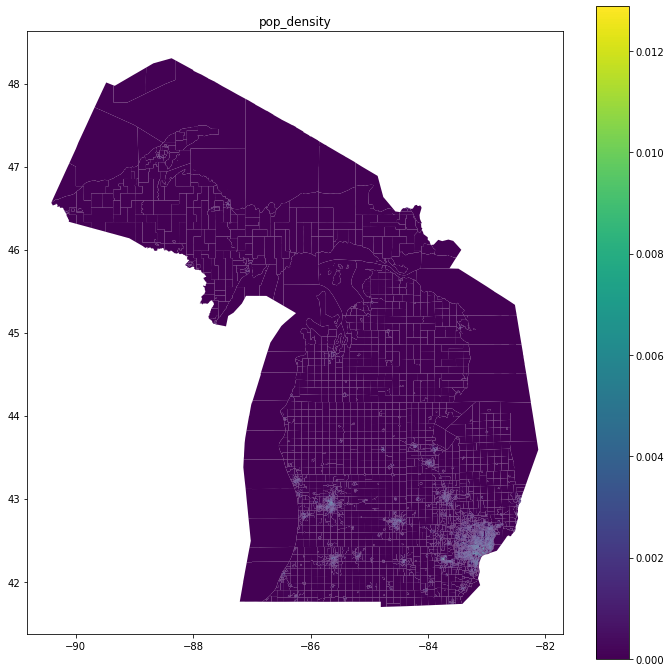

In [129]:
simple_choropleth(vtds,"pop_density")

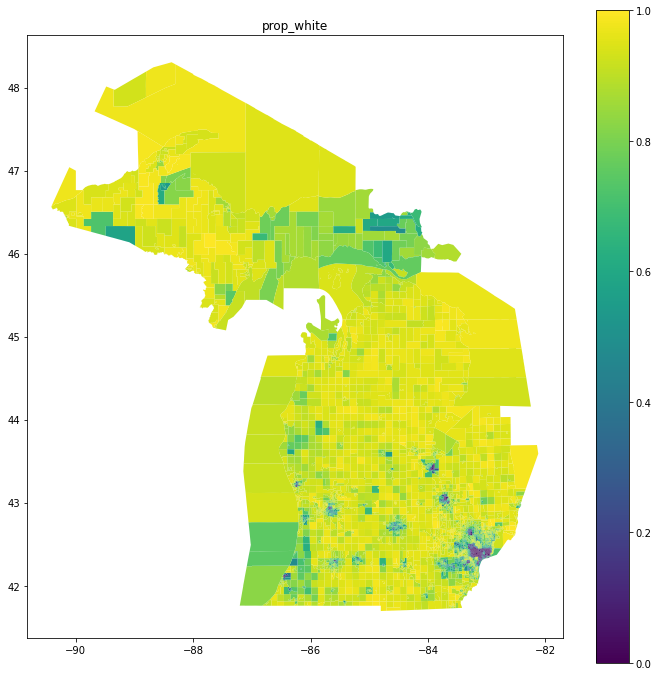

In [130]:
simple_choropleth(vtds,"prop_white")

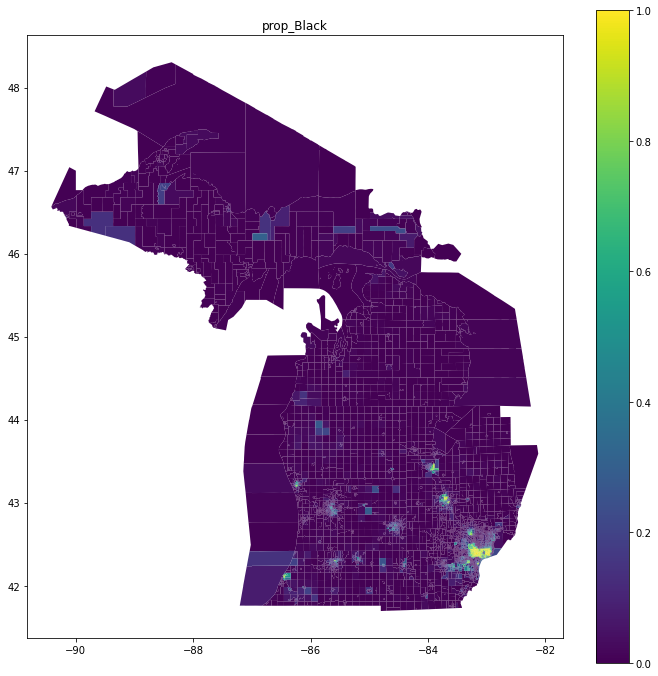

In [131]:
simple_choropleth(vtds,"prop_Black")

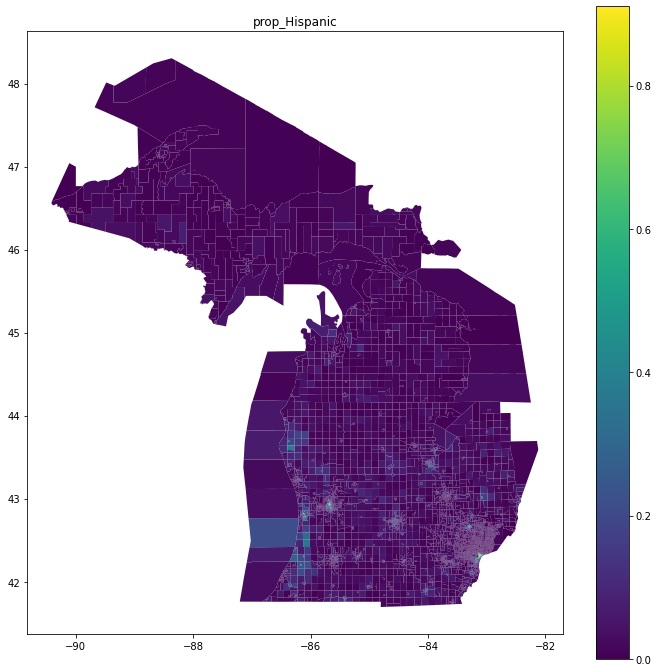

In [132]:
simple_choropleth(vtds,"prop_Hispanic")

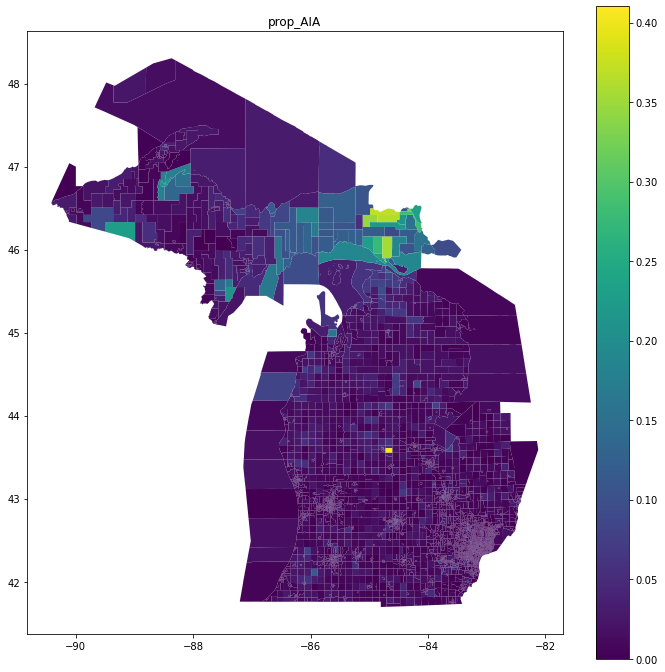

In [133]:
simple_choropleth(vtds,"prop_AIA")

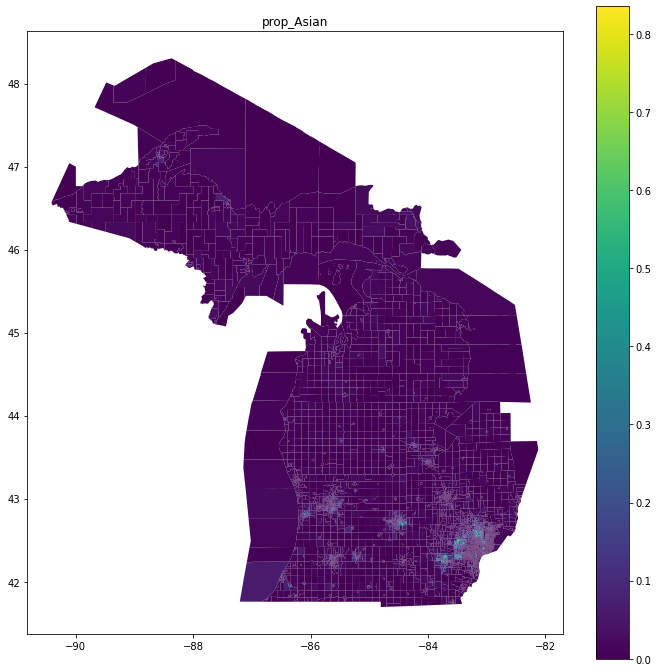

In [134]:
simple_choropleth(vtds,"prop_Asian")

In [135]:
output_vtds[[
                "VTD_ID","total_pop","pop_density","prop_white","prop_Black","prop_Hispanic","prop_AIA","prop_Asian"
    ]].to_csv(
                "data/MI_VTD_demographics.csv",index=False
            )

In [136]:
# check
pd.read_csv("data/MI_VTD_demographics.csv")

,VTD_ID,total_pop,pop_density,prop_white,prop_Black,prop_Hispanic,prop_AIA,prop_Asian
0,26001001001,1207.804879,0.000007,0.979628,0.001625,0.006426,0.003294,0.004178
1,26001001002,900.160254,0.000005,0.970183,0.000000,0.009807,0.002979,0.007299
2,26001001003,734.259490,0.000004,0.956542,0.000000,0.019545,0.018574,0.005339
3,26001001004,1153.336515,0.000017,0.957575,0.010796,0.005826,0.009611,0.010857
4,26001001005,728.053661,0.000008,0.965826,0.002006,0.013346,0.009739,0.002126
...,...,...,...,...,...,...,...,...
4800,26165165017,2220.556261,0.000024,0.928959,0.003546,0.017013,0.013569,0.030324
4801,26165165018,649.342851,0.000007,0.967061,0.003378,0.022804,0.008446,0.000000
4802,26165165019,524.447372,0.000006,0.959952,0.000709,0.011411,0.021145,0.005098
4803,26165165020,784.265861,0.000009,0.955280,0.002365,0.011091,0.019053,0.010148
